In [2]:
import pandas as pd

In [3]:
cgf = pd.read_csv('../data files/CardioGoodFitness.csv')
cgf.head()
cgf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
Product          180 non-null object
Age              180 non-null int64
Gender           180 non-null object
Education        180 non-null int64
MaritalStatus    180 non-null object
Usage            180 non-null int64
Fitness          180 non-null int64
Income           180 non-null int64
Miles            180 non-null int64
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [4]:
cgf['Gender'] = cgf['Gender'].astype('category')

In [5]:
cgf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
Product          180 non-null object
Age              180 non-null int64
Gender           180 non-null category
Education        180 non-null int64
MaritalStatus    180 non-null object
Usage            180 non-null int64
Fitness          180 non-null int64
Income           180 non-null int64
Miles            180 non-null int64
dtypes: category(1), int64(6), object(2)
memory usage: 11.6+ KB


In [4]:
cgf.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd298ea350>,
      dtype=object)

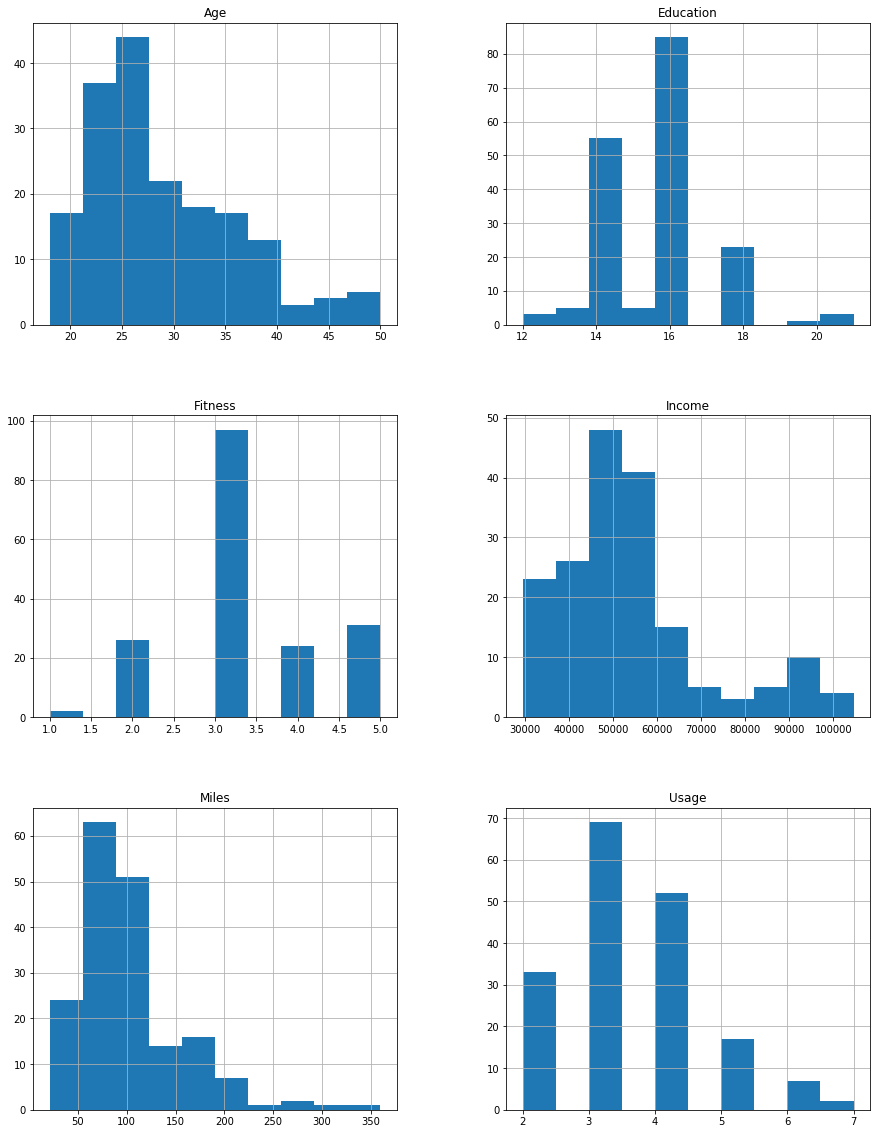

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

cgf.hist(figsize=(15,20))

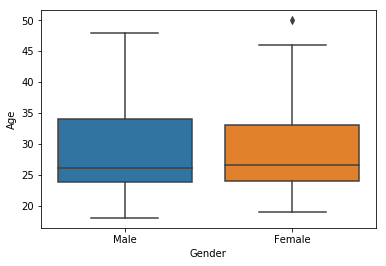

In [6]:
import seaborn as sb
sb.boxplot(x='Gender',y='Age',data=cgf) #for numerical data

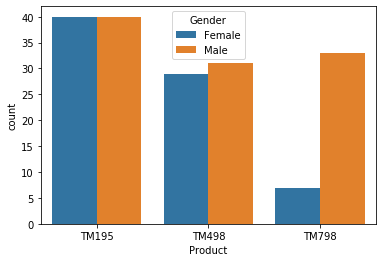

In [21]:
pd.crosstab(index=cgf['Product'],columns=cgf['Gender']) #for categorical data
#or
sb.countplot(x='Product',hue='Gender',data=cgf)

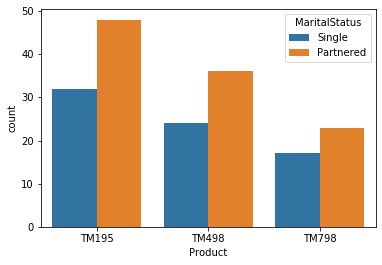

In [22]:
pd.crosstab(cgf['Product'],cgf['MaritalStatus'])
sb.countplot(x='Product',hue='MaritalStatus',data=cgf)

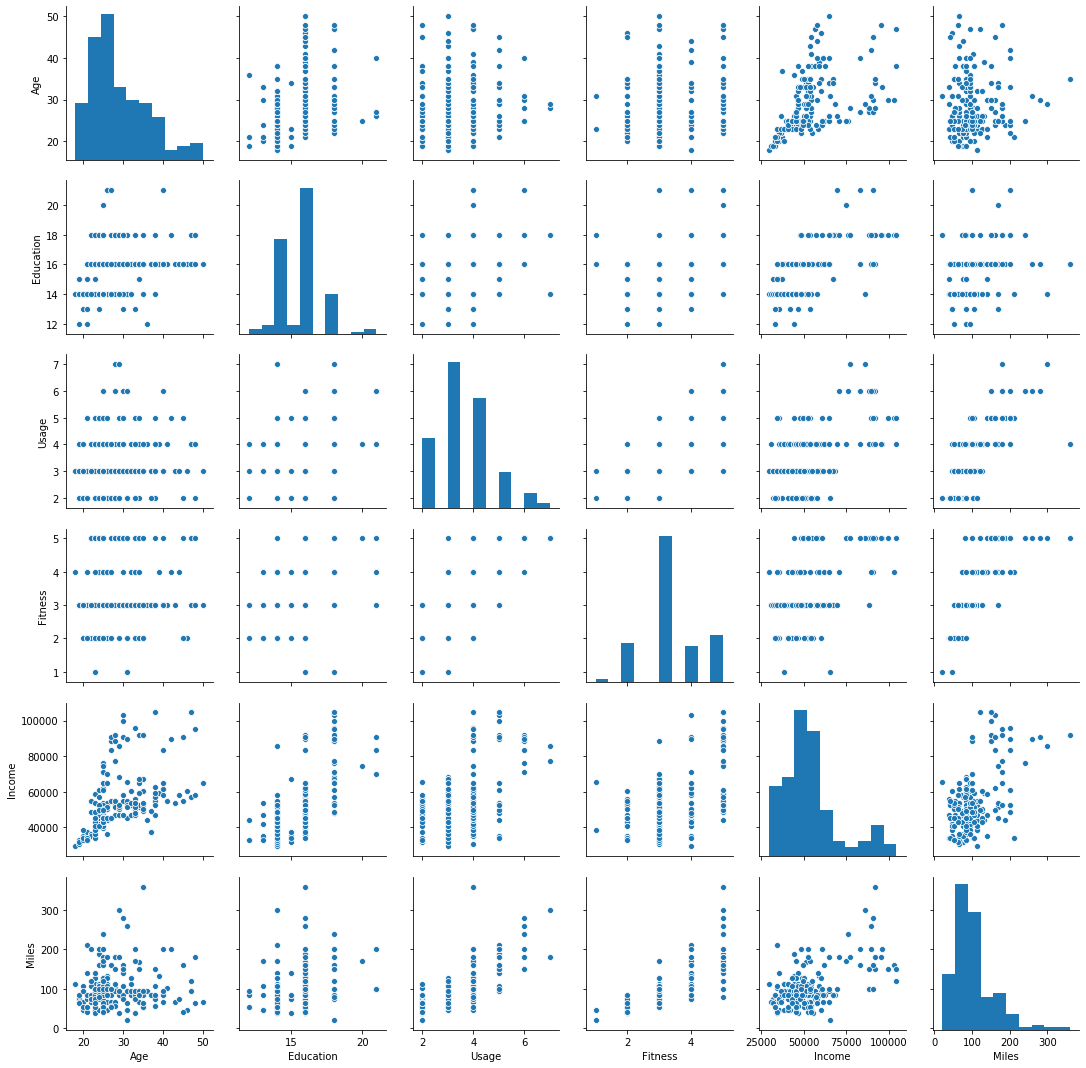

In [23]:
sb.pairplot(cgf) #plots only numerical variables

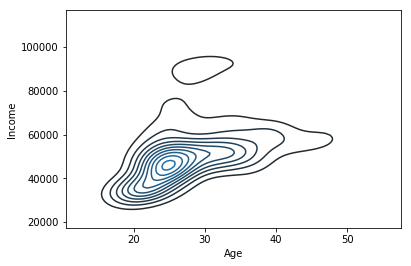

In [16]:
#sb.distplot(cgf['Age'])
#the curve is estimated for the whole population while the histogram is the sample on which we are working upon
#the curve is density function even though the function is named as distplot
#while I have not seen the new observations, I have seen observations similar to the new ones
#I Dont want to know the average of the sample, instead the average of the population(curve)
sb.kdeplot(cgf['Age'],cgf['Income'])
#sb.kdeplot(cgf['Age'],cumulative=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11aa6d950>,
      dtype=object)

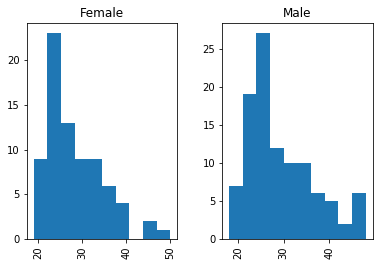

In [5]:
cgf.hist(by='Gender',column='Age')

In [6]:
#We make assumptions about the distribution(normal) and perform calculations to figure out wether we are going correct
#all models are wrong but some are useful
#for a normal symmetric distribution, mean=median
#for many outliers(the tail of curve is long), use median
#heavy tail distribution - network traffic, we spend 1-2 minutes on fb, insta, twitter but too much time on youtube, spotify
#mode : what is most likely


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11bff2550>,
      dtype=object)

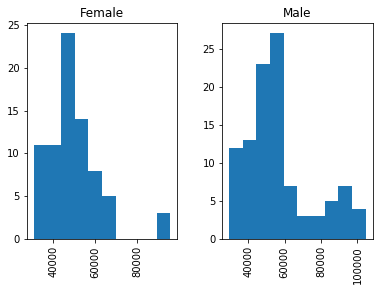

In [7]:
cgf.hist(by='Gender',column='Income')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11bffb5d0>,
      dtype=object)

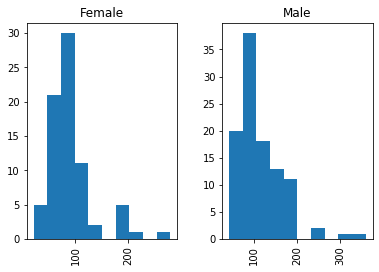

In [8]:
cgf.hist(by='Gender',column='Miles')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c209d90>,
      dtype=object)

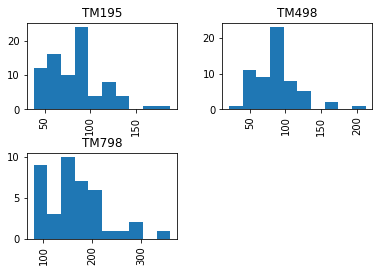

In [9]:
cgf.hist(by='Product',column='Miles')

In [17]:
corr = cgf.corr()
corr

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


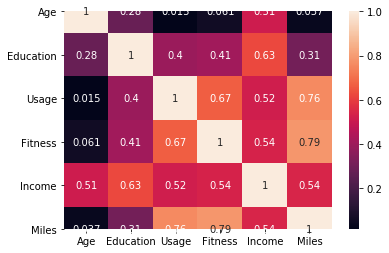

In [16]:
sb.heatmap(corr, annot=True)

In [18]:
#correlation : measure of linear relationship, non-linear would cancel out to 0
#correlation is close to +1 -> strong +ve relation -> if one of the variable is above avg, then other is also likely to be above avg
#calculate only for numeric values
# age vs education: weak +ve relation(0.26), look into partplot for age vs education
#weak corr -> no slope
#strong corr-> slope varies
#coor = 0: scattered observations, we wont see any relationship
#dim red = two var are combined into one which tells about both the var

In [19]:
#If I have 3 variables, how do I describe the relation between them?
#We can use linear Regression. But is there a linear r/n b/n these 3 variables? - Not necessarily
#descriptive(for r/n), it simply describes.
#predictive, enter values for x and get y
#presciptive, enter values for y and try finding values of x

In [21]:
from sklearn import linear_model

regressor = linear_model.LinearRegression()

y = cgf['Miles']
x = cgf[['Usage','Fitness']]

regressor.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
regressor.coef_

array([20.21486334, 27.20649954])

In [23]:
regressor.intercept_

-56.74288178464862

In [ ]:
# Predicted_miles = -56.74288178464862 + 20.21486334*Usage + 27.20649954*Fitness
# interpretation:  If usage remains constant, if fitness goes up by 1 unit then miles will go up by 27.20649954 units
# If fitness remains constant, if usage goes up by 1 unit then miles will go up by 20.21486334 units
# intercept : if I dont use the product at all and I have 0 fitness, then I run for 56 miles (which doesnt make sense)
# as fitness goes up, miles go up(+ve) and if usage goes up, miles go up(+ve)
# precitive :  min(sum(yi - b0 + b1x1 + b2x2)^2)
# video = 3:30:00
# we find the equation with 3 or more variables but visualization becomes a problem for more than 2-D
# forecasting : prediction over time
# find values of b0,b1,b2... such that the MSE is the smallest(plot multiple lines and select the best one with min MSE)
# 4:08:00

Screenshot 2020-02-13 at 11.48.10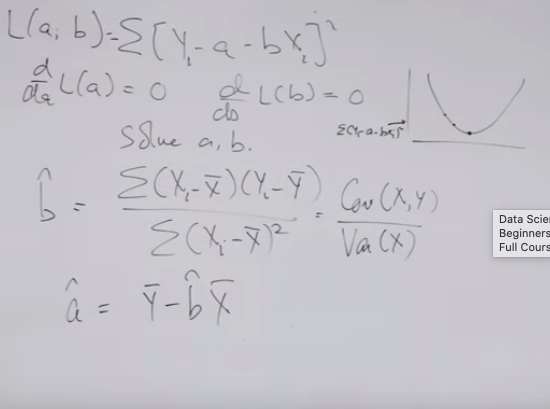

In [30]:
regressor = linear_model.LinearRegression()

y = cgf['Miles']
x = cgf[['Usage']]

regressor.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
regressor.coef_

array([36.29364912])

In [32]:
regressor.intercept_

-22.220276400464158

In [33]:
cgf['Miles'].std()

51.86360466180934

In [34]:
cgf['Miles'].mean()

103.19444444444444

In [36]:
cgf['Miles'].var()

2689.8334885164513

In [37]:
cgf.cov()

,Age,Education,Usage,Fitness,Income,Miles
Age,48.212166,3.149410,0.113470,0.406828,5.884446e+04,13.186530
Education,3.149410,2.614867,0.693172,0.636623,1.670472e+04,25.770795
Usage,0.113470,0.693172,1.176785,0.695469,9.303043e+03,42.709808
Fitness,0.406828,0.636623,0.695469,0.919429,8.467925e+03,39.073246
Income,58844.463439,16704.717815,9303.042582,8467.925388,2.724706e+08,465265.361887
Miles,13.186530,25.770795,42.709808,39.073246,4.652654e+05,2689.833489


In [39]:
# coeff or slope = cov(miles,usage)/var(usage)
42.709808/cgf['Usage'].var()

36.293649482012825

In [41]:
#intercept
#mean(miles) - slope*mean(usage)
cgf['Miles'].mean() - 36.293649482012825*cgf['Usage'].mean()

-22.220277654510994

In [42]:
# therefore, we verified the intercept and the coefficient/slope

In [43]:
#List - mutable
#tuple - immutable
#dict - mutable
#set - unindexed and unordered and unique

In [44]:
class phone:
    
    def make_call(self):
        print('Calling...')
    def cancel_call(self):
        print('cancelled!')

In [45]:
call_1 = phone()

In [46]:
call_1.make_call()

Calling...


In [47]:
call_1.cancel_call()

cancelled!


In [53]:
class phone():
    
    def add_color(self,color):
        self.color = color
    
    def add_cost(self,cost):
        self.cost = cost
    
    def show_color_and_cost(self):
        return self.color+' '+self.cost
    
    def play_game(self):
        print('Sorry, you cannot play a game')

In [54]:
p1 = phone()
p1.add_color('Green')
p1.add_cost('200')
p1.show_color_and_cost()

'Green 200'

In [55]:
p2 = phone()
p2.add_color('Red')
p2.add_cost('100')
p2.show_color_and_cost()

'Red 100'

In [56]:
class Iphone(phone):
    def unique_func(self):
        print('function only for Iphone class')

In [57]:
iphone1 = Iphone()
iphone1.add_color('black')
iphone1.add_cost('500')
iphone1.show_color_and_cost()

'black 500'

In [58]:
iphone1.unique_func()

function only for Iphone class


In [62]:
import numpy as np

In [63]:
np_array_1 = np.array([1,2,3,4,5])
np_array_1

array([1, 2, 3, 4, 5])

In [65]:
np_array_2 = np.array([[1,2,3,4],[5,6,7,8]])
np_array_2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [66]:
np_zero_array_1 = np.zeros((1,2))
np_zero_array_1

array([[0., 0.]])

In [67]:
np_zero_array_2 = np.zeros((5,5))
np_zero_array_2

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [68]:
np_full_array_1 = np.full((3,3),10)
np_full_array_1

array([[10, 10, 10],
       [10, 10, 10],
       [10, 10, 10]])

In [69]:
np_seq_array_1 = np.arange(1,11)
np_seq_array_1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [70]:
np_seq_array_2 = np.arange(1,20,5)
np_seq_array_2

array([ 1,  6, 11, 16])

In [71]:
np_rand_array_1 = np.random.randint(1,100,5)
np_rand_array_1

array([41, 90, 52, 51, 27])

In [73]:
np_shape_array_1 = np.array([[5,6,7,8,9],[1,2,3,4,5]])
np_shape_array_1.shape

(2, 5)

In [75]:
np_shape_array_1.shape = (5,2)
np_shape_array_1

array([[5, 6],
       [7, 8],
       [9, 1],
       [2, 3],
       [4, 5]])

In [78]:
a = np.array([10,20])
b = np.array([40,30])
np.sum([a,b])

100

In [79]:
np.sum([a,b],axis=0)

array([50, 50])

In [80]:
np.sum([a,b],axis=1)

array([30, 70])

In [82]:
np_stack_array_1 = np.array([1,2,3])
np_stack_array_2 = np.array([4,5,6])
np.vstack([np_stack_array_1,np_stack_array_2])

array([[1, 2, 3],
       [4, 5, 6]])

In [83]:
np.hstack([np_stack_array_1,np_stack_array_2])

array([1, 2, 3, 4, 5, 6])

In [84]:
np.column_stack([np_stack_array_1,np_stack_array_2])

array([[1, 4],
       [2, 5],
       [3, 6]])

In [85]:
import pandas as pd

In [86]:
x = pd.Series([1,2,3,4,5])
y1 = 2*x
y2 = 3*x

In [88]:
from matplotlib import pyplot as plt
%matplotlib inline

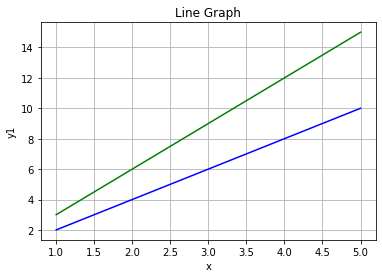

In [93]:
plt.plot(x,y1,color='Blue')
plt.plot(x,y2,color='Green')
plt.title('Line Graph')
plt.xlabel('x')
plt.ylabel('y1')
plt.grid(True)
plt.show()

In [99]:
student = {'A':10,'B':20,'C':30}
name = list(student.keys())
marks = list(student.values())

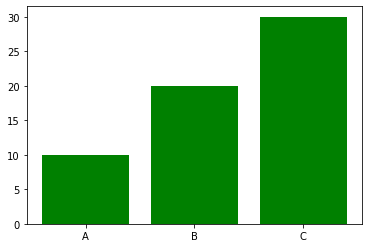

In [100]:
plt.bar(name,marks,color='Green')
plt.show()

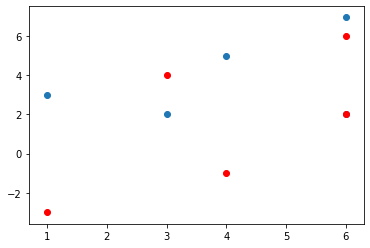

In [102]:
x = [4,1,3,6,6]
y = [5,3,2,2,7]
y1 = [-1,-3,4,6,2]
plt.scatter(x,y)
plt.scatter(x,y1,color='Red')
plt.show()

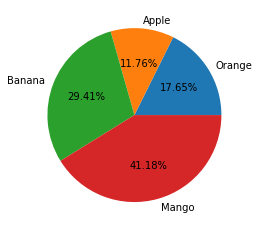

In [107]:
#bar graph = categorical data
#histogram = numeric data
fruits = ['Orange','Apple','Banana','Mango']
cost = [30,20,50,70]
plt.pie(cost,labels=fruits,autopct='%0.2f%%')
plt.show()